In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model
import itertools

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

# Task 1

In [59]:
cars_df = pd.read_csv("car_data.csv")
cars_df.head(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


## Import data using 'usecols' to pick relevant columns

In [37]:
miles_price = [0, 1]
mileage = pd.read_csv("car_data.csv", usecols=miles_price)

## Print sample of data

In [38]:
mileage.head(5)

,Price,Mileage
0,17314.103129,8221
1,17542.036083,9135
2,16218.847862,13196
3,16336.913140,16342
4,16339.170324,19832


## Create linear object and reshape/rename x and y-axis

In [39]:
mileage_linear = sklearn.linear_model.LinearRegression()

In [40]:
x = mileage['Mileage'].reshape(-1,1)

In [41]:
y = mileage['Price'].reshape(-1,1)

## Fit data into linear object

In [42]:
mileage_linear.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Graph to compare mileage and price and showcase linear regression

In [43]:
mileage_linear.score(x, y)

0.020463447323489481

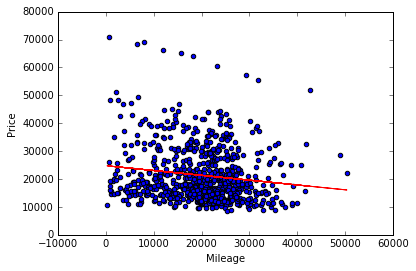

In [44]:
plt.scatter(x, y)
plt.xlabel("Mileage")
plt.ylabel("Price")

plt.plot(x, mileage_linear.predict(x), color='red')


## Very weak correlation - mileage is a pretty poor indicator of price. 

In [45]:
print('Score:', mileage_linear.score(x, y))

Score: 0.0204634473235


## Task 2

## Import data and create linear regression object

In [46]:
columns = [0, 1, 6, 7, 8, 9, 10, 11]
task_2 = pd.read_csv("car_data.csv", usecols=columns)

columns = [1, 6, 7, 8, 9, 10, 11]
combo = pd.read_csv("car_data.csv", usecols=columns)

In [47]:
cars_linear = sklearn.linear_model.LinearRegression()

# cars_linear = sklearn.linear_model.LinearRegression()
# cylinder_linear = sklearn.linear_model.LinearRegression()
# liter_linear = sklearn.linear_model.LinearRegression()
# doors_linear = sklearn.linear_model.LinearRegression()
# sound_linear = sklearn.linear_model.LinearRegression()
# leather_linear = sklearn.linear_model.LinearRegression()
# cruise_linear = sklearn.linear_model.LinearRegression()

## Create x,y variables and fit into linear object

In [48]:
x = task_2[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Sound', 'Leather', 'Cruise']] 

In [49]:
y = task_2[['Price']]

In [50]:
cars_linear.fit(task_2[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Sound', 'Leather', 'Cruise']], task_2[['Price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Showcase coefficient and interecept figures

In [51]:
cars_linear.coef_

array([[ -1.69747832e-01,   3.79237893e+03,  -7.87220732e+02,
         -1.54274585e+03,  -1.99379528e+03,   3.34936162e+03,
          6.28899715e+03]])

In [52]:
cars_linear.intercept_

array([ 6758.7551436])

## R2 score is .44, showing moderate correlation strength. 

In [53]:
cars_linear.score(x, y)

0.44626435367283801

## Find combination of factors that determine the most accurate price

In [54]:
# feature_columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
price = task_2['Price']

combinations = [list(itertools.combinations(combo, x)) for x in range(1,7)]
massaged_combos = []
for lst in combinations:
    for iterable in lst:
        massaged_combos.append(list(iterable))

scores = []
for lst in massaged_combos:
    regr_cars = linear_model.LinearRegression()
    regr_cars.fit(task_2[lst], price)
    scores.append((regr_cars.score(task_2[lst], price), lst))

sorted(scores, reverse=True)

[(0.4456909210587025,
  ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']),
 (0.43780574153663798,
  ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather']),
 (0.43694021512372461, ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather']),
 (0.43014148406475605,
  ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather']),
 (0.43001820483252684, ['Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather']),
 (0.42653486378092642,
  ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']),
 (0.42576813279744219, ['Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']),
 (0.42482840454267856,
  ['Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']),
 (0.42441824017998753,
  ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound']),
 (0.42409748258510405, ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound']),
 (0.42253076703984671, ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Leather']),
 (0.42250742147747622, ['Mileage', 'Cylinder', 'Cruise', 'Leather']),
 (0.419

As the list showcases, a combination of 
('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather') 
seem to be the strongest (.44) indicator of price. 

## Task 3

In [56]:
dummies_df = pd.read_csv("car_data.csv")

In [64]:
dummy_make = pd.get_dummies(dummies_df[['Make']])
dummy_model = pd.get_dummies(dummies_df[['Model']])
dummy_type = pd.get_dummies(dummies_df[['Type']])

In [72]:
dummies_df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [74]:
dummy_type

,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0
